In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
import io

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df2 = pd.read_csv("DF2", index_col = 0)
#new_header = df2.iloc[0] 
#df2 = df2[1:] 
#df2.columns = new_header
#df2.drop([0], axis = 1)
df2

,0,1
0,1.038502,0.835053
1,0.320455,0.149079
2,0.055480,0.271672
3,-0.007260,-0.126550
4,-1.237390,-1.049932
...,...,...
9995,-0.632309,-0.797517
9996,0.679417,0.526470
9997,0.890697,1.072751
9998,0.475293,0.536909


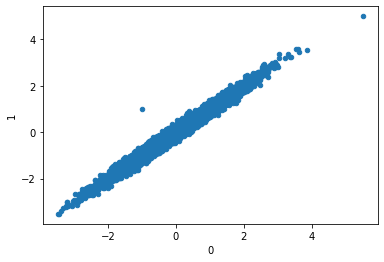

In [ ]:
covPlot = df2.plot.scatter(x = 0, y = 1 )

# the outlying points are: (-1,1) and (5.5, 5)
# (5.5,5) might seem further away, if we look at the plot with 
# a perspective using eclidian distance
# however, the variance in one dimension may 
# differ than the variance of the other dimension
# so the real standard deviations of the outlier points may not seem obvious.
# For multivariate distributions, we can use Mahalanobis distance to see which outlier 
# stands out more because it takes into account the variances in each direction and the covariance
# between the variables
# basically, it transforms the variables into an uncorrelated space


In [ ]:
Y = df2[['1']]
Y.head()


,1
0,0.835053
1,0.149079
2,0.271672
3,-0.126550
4,-1.049932


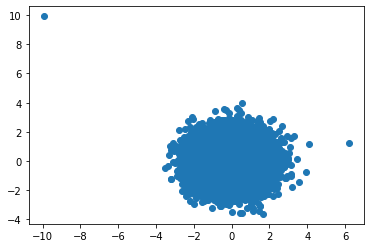

In [ ]:
Q = df2.cov()
#print(Q)
Q_inv = np.linalg.inv(Q)
#print(Q_inv)

U = np.array(df2.iloc[:,0].values)
V = np.array(df2.iloc[:,1].values)
samples_Q = ([U,V])

from scipy.linalg import sqrtm

Qi_undo = sqrtm(np.linalg.inv(np.cov(samples_Q)))

samples_Undo = np.matmul(Qi_undo, samples_Q)

plt.scatter(x=samples_Undo[0], y=samples_Undo[1])